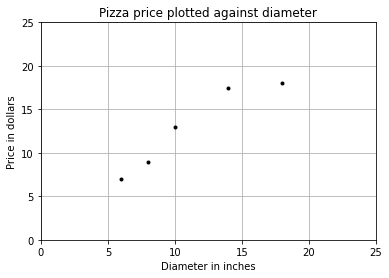

In [ ]:
import numpy as np  
# "np" and "plt" are common aliases for NumPy and Matplotlib, respectively.
import matplotlib.pyplot as plt 
%matplotlib inline
# X represents the features of our training data, the diameters of the pizzas. 
# A scikit-learn convention is to name the matrix of feature vectors X.  
# Uppercase letters indicate matrices, and lowercase letters indicate vectors. 
X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1) 
y = [7, 9, 13, 17.5, 18]  
# y is a vector representing the prices of the pizzas.

plt.figure() 
plt.title('Pizza price plotted against diameter') 
plt.xlabel('Diameter in inches') 
plt.ylabel('Price in dollars') 
plt.plot(X, y, 'k.') 
plt.axis([0, 25, 0, 25]) 
plt.grid(True) 
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Create an instance of the estimator
model.fit(X, y)  # Fit the model on the training data 

# Predict the price of a pizza with a diameter that has never been seen before 
test_pizza = np.array([[12]]) 
predicted_price = model.predict(test_pizza)[0] 
print('A 12" pizza should cost: $%.2f' % predicted_price) 

A 12" pizza should cost: $13.68


In [ ]:
print('Residual sum of squares: %.2f' % np.mean((model.predict(X)- y) ** 2)) 

Residual sum of squares: 1.75


In [ ]:
import numpy as np
X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
x_bar = X.mean()
print('Mean: ', x_bar)

# Note that we subtract one from the number of training instances when calculating the sample variance. 
# This technique is called Bessel's correction. It corrects the bias in the estimation of the population variance
# from a sample.
variance = ((X - x_bar)**2).sum() / (X.shape[0] - 1)
print('Variance: ', variance)
# Alternate way
print('Variance with Bessel Correction Using ddof: ',np.var(X, ddof=1)) 

Mean:  11.2
Variance:  23.2
Variance with Bessel Correction Using ddof:  23.2


In [ ]:
# We previously used a List to represent y.
# Here we switch to a NumPy ndarray, which provides a method to calculcate the sample mean.
y = np.array([7, 9, 13, 17.5, 18])

y_bar = y.mean()
# We transpose X because both operands must be row vectors
covariance = np.multiply((X - x_bar).transpose(), y - y_bar).sum() / (X.shape[0] - 1)
print('Covariance:', covariance)
print('Covariance (Alternate Computation Method): $%.2f ' % np.cov(X.transpose(), y)[0][1])

Covariance: 22.65
Covariance (Alternate Computation Method): $22.65 


In [ ]:
import numpy as np 
from sklearn.linear_model import LinearRegression 

X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1) 
y_train = [7, 9, 13, 17.5, 18] 

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1) 
y_test = [11, 8.5, 15, 18, 11]  

model = LinearRegression() 
model.fit(X_train, y_train) 
r_squared = model.score(X_test, y_test) 
print('Coefficient of Determination or R2: %.4f' % r_squared )

Coefficient of Determination or R2: 0.6620


Multiple Regression. Three different ways of modeling.

In [ ]:
# In[1]:
from numpy.linalg import inv
from numpy import dot, transpose

X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [ ]:
from numpy.linalg import lstsq

X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(lstsq(X, y)[0])

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [ ]:
# In[1]:
from sklearn.linear_model import LinearRegression

X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
    print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [10.0625], Target: [11]
R-squared: 0.77
Predicted: [10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [13.09375], Target: [15]
R-squared: 0.77
Predicted: [18.14583333], Target: [18]
R-squared: 0.77
Predicted: [13.3125], Target: [11]
R-squared: 0.77


Polynomial Regression. We use polynomial regression, a special case of multiple linear regression that models a linear relationship between the response variable and polynomial feature terms. The real-world curvilinear relationship is captured by transforming the features, which are then fit in the same manner as in multiple linear regression.

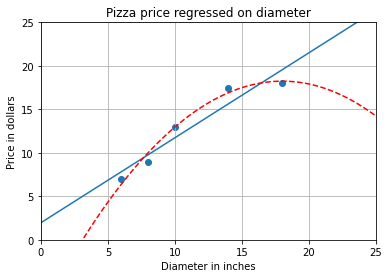

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared:0.8097
Quadratic regression r-squared: 0.8675


In [ ]:
# In[1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared:%.4f'% regressor.score(X_test, y_test))
print('Quadratic regression r-squared: %.4f'% regressor_quadratic.score(X_test_quadratic, y_test))